# High content quantum yield 

### Notes

#### refractive index

need to research standard values
DMSO = 1.479
DMF = 1.4305

#### Fluorescence quantum yields standard values

tpp

0.14 from Chris

3OH



In [1]:
import os
import pandas as pd
import numpy as np


In [2]:
pwd

'C:\\Users\\hwbst6\\OneDrive - Sheffield Hallam University\\StudentProjects\\Student projects 2022_23\\MSc\\Bhargav\\140623'

In [3]:
cd C:\\Users\\hwbst6\\OneDrive - Sheffield Hallam University\\MChem\\Tom White

C:\Users\hwbst6\OneDrive - Sheffield Hallam University\MChem\Tom White


In [4]:
pwd

'C:\\Users\\hwbst6\\OneDrive - Sheffield Hallam University\\MChem\\Tom White'

In [5]:
ls

 Volume in drive C is Windows
 Volume Serial Number is 4632-2130

 Directory of C:\Users\hwbst6\OneDrive - Sheffield Hallam University\MChem\Tom White

11/10/2023  10:50    <DIR>          .
11/10/2023  10:50    <DIR>          ..
11/10/2023  10:40    <DIR>          ChrisData
27/09/2023  12:51         1,074,026 Tom White risk assessment form September 2023 word format (002).docx
03/10/2023  22:17           628,906 Tom White risk assessment form September 2023 word format SMT.docx
09/10/2023  18:05           640,870 Tom White risk assessment SMT 06102023-DK 09102023.docx
22/09/2023  12:58           125,602 Tom White UREC1 MChem project September 2023 word format.docx
16/10/2023  11:16    <DIR>          TomWhiteHCQY23
               4 File(s)      2,469,404 bytes
               4 Dir(s)  138,741,420,032 bytes free


In [ ]:
cd C:\\Users\\hwbst6\\OneDrive - Sheffield Hallam University\\MChem\\Tom White

In [14]:
pwd

'C:\\Users\\hwbst6\\OneDrive - Sheffield Hallam University\\MChem\\Tom White'

In [15]:
cd TomWhiteHCQY23

C:\Users\hwbst6\OneDrive - Sheffield Hallam University\MChem\Tom White\TomWhiteHCQY23


In [16]:
ls

 Volume in drive C is Windows
 Volume Serial Number is 4632-2130

 Directory of C:\Users\hwbst6\OneDrive - Sheffield Hallam University\MChem\Tom White\TomWhiteHCQY23

16/10/2023  11:16    <DIR>          .
16/10/2023  11:16    <DIR>          ..
11/10/2023  13:23            33,800 hcqy_plate_map_smt_edit_11202023.xlsx
16/10/2023  11:14    <DIR>          tw_
16/10/2023  11:16    <DIR>          tw_hcqy_13102023
               1 File(s)         33,800 bytes
               4 Dir(s)  138,705,387,520 bytes free


In [6]:
#script for converting *.xlsx or csv data to a neat UV/vis format

import os
import pandas as pd
import numpy as np

# input varibles go here
abs_sht_name = "TRno4895" # this is varible for sheet name/experiment number
#sps_name = "RNA Quantiabsor-003- 5-7-22.xlsx" # this is the spread sheet name if your using a spread sheet
abs_inp= pd.DataFrame()
#load in plate reader output uncomment the one you want to use
try:
    # use this if your reading in from a multisheet excel
    #abs_inp = pd.read_excel(sps_name, sheet_name = sht_name)

    # use this if your reading from a *csv file
    abs_inp = pd.read_csv(abs_sht_name + '.csv')
except PermissionError:
    print('The file we are trying to open may be open in another program, please close and try again!')
    

try: #transpose and remove some columns, these may need changeing
    abs_inp= pd.DataFrame.transpose(abs_inp)
    abs_inp = abs_inp.drop(axis=1, columns=[0,1,2,3])
    #print(abs_inp)
except KeyError:
    print('Check the your input file!') 
    
try:    #abs_inp.sort_index()
    abs_inp = abs_inp.reset_index(drop=True)
    #build well name and remove related columns
    abs_inp.iloc[0:,1] = abs_inp.iloc[0:,1].astype(str)
    abs_inp.iloc[0:,2] = abs_inp.iloc[0:,0].astype(str) + abs_inp.iloc[0:,1].astype(str)
    
    abs_inp = abs_inp.drop(axis=1, columns=[4,5])
    abs_inp = pd.DataFrame.drop(abs_inp,axis=0, index=0)
    abs_inp.iloc[0,0] = "Well"
except IndexError:
    print('Check the your input file!')

try:     
    abs_inp.rename(columns=abs_inp.iloc[0,0:], inplace=True) # set row 0 as col titles
    abs_inp = abs_inp.reset_index(drop=True)
    abs_inp = pd.DataFrame.drop(abs_inp, axis=0, index=0)
    abs_inp = abs_inp.reset_index(drop=True)
    
    #print(abs_inp)
except KeyError:
    print('Check the your input file!')
try: #output results
    abs_inp.to_csv("hcqy_abs_dat_" + abs_sht_name + ".csv",index=False)
    print(abs_inp.head(14))
    
except PermissionError:
    print('The file we are trying to open may be open in another program, please close and try again!')



   Well    400    402    404    406    408    410    412    414    416  ...  \
0    A1  0.042  0.043  0.042  0.042  0.043  0.044  0.045  0.047   0.05  ...   
1    A2  0.539  0.567  0.619  0.714   0.88  1.134  1.452  1.768  1.957  ...   
2    A3  0.361  0.381  0.414  0.477  0.593  0.774  1.021  1.302  1.502  ...   
3    A4  0.236  0.248  0.268  0.305  0.376   0.49  0.648  0.834  0.966  ...   
4    A5  0.138  0.143  0.153  0.172  0.207  0.263  0.344  0.437  0.499  ...   
5    A6  0.084  0.087  0.091  0.099  0.115  0.141  0.177  0.218  0.246  ...   
6    A7  0.048  0.048  0.048  0.048  0.048  0.049  0.049  0.049   0.05  ...   
7    A8  1.273  1.347  1.402  1.499  1.698  1.967  2.197  2.386   2.44  ...   
8    A9  0.865   0.91  0.947   1.02  1.171  1.424  1.752  2.047  2.225  ...   
9   A10  0.479  0.503  0.523  0.563  0.649  0.809  1.052  1.388  1.758  ...   
10  A11  0.253  0.265  0.275  0.295  0.339  0.421  0.554  0.751  0.997  ...   
11  A12  0.133  0.138  0.141  0.147  0.165  0.196  0

In [18]:
ls

 Volume in drive C is Windows
 Volume Serial Number is 4632-2130

 Directory of C:\Users\hwbst6\OneDrive - Sheffield Hallam University\MChem\Tom White\TomWhiteHCQY23

16/10/2023  11:16    <DIR>          .
16/10/2023  11:16    <DIR>          ..
11/10/2023  13:23            33,800 hcqy_plate_map_smt_edit_11202023.xlsx
16/10/2023  11:14    <DIR>          tw_
16/10/2023  11:16    <DIR>          tw_hcqy_13102023
               1 File(s)         33,800 bytes
               4 Dir(s)  138,702,426,112 bytes free


In [3]:
cd tw_hcqy_13102023

C:\Users\hwbst6\DataTime\HCQY\high_content_quantum_yield\tw_hcqy_13102023


In [5]:
#script for converting *.xlsx or csv data to a neat Fluorescentcs format

import os
import pandas as pd
import numpy as np

# input varibles go here
flu_sht_name = "TRno4897" # this is varible for sheet name/experiment number
#sps_name = "RNA Quantifluor-003- 5-7-22.xlsx" # this is the spread sheet name if your using a spread sheet
flu_inp= pd.DataFrame()
#load in plate reader output uncomment the one you want to use
try:
    # use this if your reading in from a multisheet excel
    #flu_inp = pd.read_excel(sps_name, sheet_name = sht_name)

    # use this if your reading from a *csv file
    flu_inp = pd.read_csv(flu_sht_name + '.csv')
except PermissionError:
    print('The file we are trying to open may be open in another program, please close and try again!')
    

try: #transpose and remove some columns, these may need changeing
    flu_inp= pd.DataFrame.transpose(flu_inp)
    flu_inp = flu_inp.drop(axis=1, columns=[0,1,2,3])
    #print(flu_inp)
except KeyError:
    print('Check the your input file!') 
    
try:    #flu_inp.sort_index()
    flu_inp = flu_inp.reset_index(drop=True)
    #build well name and remove related columns
    flu_inp.iloc[0:,1] = flu_inp.iloc[0:,1].astype(str)
    flu_inp.iloc[0:,2] = flu_inp.iloc[0:,0].astype(str) + flu_inp.iloc[0:,1].astype(str)
    
    flu_inp = flu_inp.drop(axis=1, columns=[4,5])
    flu_inp = pd.DataFrame.drop(flu_inp,axis=0, index=0)
    flu_inp.iloc[0,0] = "Well"
except IndexError:
    print('Check the your input file!')

try:     
    flu_inp.rename(columns=flu_inp.iloc[0,0:], inplace=True) # set row 0 as col titles
    flu_inp = flu_inp.reset_index(drop=True)
    flu_inp = pd.DataFrame.drop(flu_inp, axis=0, index=0)
    flu_inp = flu_inp.reset_index(drop=True)
    print(flu_inp)
except KeyError:
    print('Check the your input file!')
try: #output results
    flu_inp.to_csv("hcqy_abs_dat_" + flu_sht_name + ".csv",index=False)
    print(flu_inp)
except PermissionError:
    print('The file we are trying to open may be open in another program, please close and try again!')



   Well  580   581   582   583   584   585   586   587   588  ...     731  \
0    A1  190   186   165   196   180   186   173   184   214  ...    3469   
1    A2  886   919   869   956  1018  1049  1133  1179  1315  ...   62014   
2    A3  539   605   628   653   702   715   753   786   823  ...   40362   
3    A4  471   441   473   475   507   537   567   624   598  ...   25331   
4    A5  211   234   203   239   281   237   284   314   324  ...   14505   
..  ...  ...   ...   ...   ...   ...   ...   ...   ...   ...  ...     ...   
91   H8  883   945  1029  1145  1216  1464  1660  1853  1974  ...  182888   
92   H9  893  1011  1074  1190  1289  1437  1548  1714  1886  ...  133382   
93  H10  901   857   880   937   974  1116  1203  1308  1454  ...   83876   
94  H11  741   775   796   900   860   911  1047  1113  1228  ...   32268   
95  H12  181   187   206   205   234   264   280   322   311  ...   18709   

       732     733     734     735     736     737     738    739    740  


In [75]:
# Plot and calculate gradients for Chris's optimised plate map
hcqy_plot= pd.DataFrame()

ps_lst = ["TPP","C5","C6","C7"]

exp_points = 5
num_ps =4

# setup columns
hcqy_plot.insert(0,"PS", range(0,(exp_points*num_ps)))
for p in range(0,len(ps_lst)):
    #print(p*exp_points)
    hcqy_plot.iloc[(p*exp_points):(p*(exp_points))+5] = ps_lst[p]
# add abs values at excitation wavelength
hcqy_plot["ex_abs"] = 0

for p in range(0,len(ps_lst)):
    #print(p*exp_points)
    n=0
    while n <= (exp_points-1):
        print(p*exp_points+n+1+p)
        #hcqy_plot.iloc[(p*exp_points+n):(p*(exp_points))+1+n,1] = abs_inp.iloc[(p*exp_points+n+1):(p*(exp_points))+2+n,1] 
        hcqy_plot.iloc[(p*exp_points+n),1] = abs_inp.iloc[(p*exp_points+n+1+p),1]
        n = n +1
hcqy_plot["ex_abs_1"] = 0

for p in range(0,len(ps_lst)):
    #print(p*exp_points)
    n=0
    while n <= (exp_points-1):
        #print(n)
        #hcqy_plot.iloc[(p*exp_points+n):(p*(exp_points))+1+n,1] = abs_inp.iloc[(p*exp_points+n+1):(p*(exp_points))+2+n,1] 
        hcqy_plot.iloc[(p*exp_points+n),2] = abs_inp.iloc[(p*exp_points+n+1),1]
        n = n +1
    
print(hcqy_plot)


    # populates experiemnt names and data point names
    
# populate corrected abs

# populate integrated fluorescence intensities

# set up gradiant data frame with experiemnt by experiemnt possitions

# populate gradiant data frame

# QC on gradient data frame

# prep for QY calc collect standard QY values and check solvents
# take mean of standard gradient

# calculate QYs expoert to *.csv

# generate plots





1
2
3
4
5
7
8
9
10
11
13
14
15
16
17
19
20
21
22
23
     PS ex_abs ex_abs_1
0   TPP  0.539    0.539
1   TPP  0.361    0.361
2   TPP  0.236    0.236
3   TPP  0.138    0.138
4   TPP  0.084    0.084
5    C5  1.273    0.048
6    C5  0.865    1.273
7    C5  0.479    0.865
8    C5  0.253    0.479
9    C5  0.133    0.253
10   C6  0.527    0.133
11   C6  0.385    0.045
12   C6  0.281    0.527
13   C6   0.15    0.385
14   C6  0.082    0.281
15   C7  1.311     0.15
16   C7  0.877    0.082
17   C7  0.439    0.035
18   C7    0.3    1.311
19   C7  0.041    0.877


In [2]:
pwd

'C:\\Users\\hwbst6\\DataTime\\HCQY\\high_content_quantum_yield'

In [4]:
ls

 Volume in drive C is Windows
 Volume Serial Number is 4632-2130

 Directory of C:\Users\hwbst6\DataTime\HCQY\high_content_quantum_yield\tw_hcqy_13102023

02/01/2024  17:48    <DIR>          .
02/01/2024  17:48    <DIR>          ..
19/10/2023  09:18           114,892 hcqy_abs_dat_TRno4895.csv
18/10/2023  19:27            87,737 hcqy_abs_dat_TRno4897.csv
13/10/2023  15:24           121,664 TRno4895.CSV
13/10/2023  15:26            93,368 TRno4897.CSV
               4 File(s)        417,661 bytes
               2 Dir(s)  72,596,746,240 bytes free


coefficient of determination: 0.9982599556240772
gradient: [1.29480478e+08]


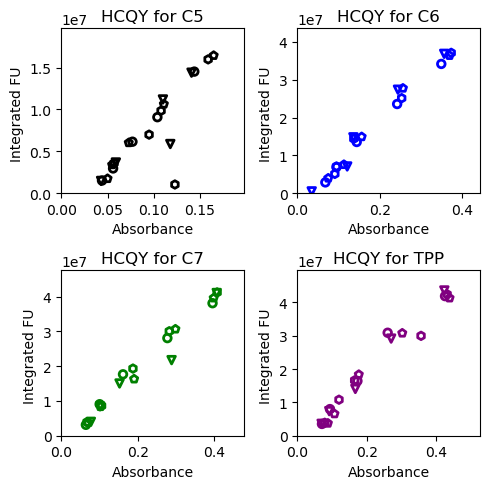

In [184]:
# Plot and calculate gradients for Chris's optimised plate map
from sklearn.linear_model import LinearRegression
hcqy_plot= pd.DataFrame()

ps_lst = ["TPP","C5","C6","C7"]

exp_points = 5
num_ps = 4
num_rep = 4
abs_wav_len_start = 400
exc_wav_len = 516

# setup columns
hcqy_plot.insert(0,"PS", range(0,(exp_points*num_ps)))
for p in range(0,len(ps_lst)):
    hcqy_plot.iloc[(p*exp_points):(p*(exp_points))+5] = ps_lst[p]
    
# define excitation wavelength
exc_col_num = int((exc_wav_len - abs_wav_len_start) / 2)

# populates experiemnt names and data point names
# add abs values at excitation wavelength
hcqy_plot["ex_abs_1"], hcqy_plot["ex_abs_2"], hcqy_plot["ex_abs_3"], hcqy_plot["ex_abs_4"]  = [0, 0, 0, 0]
hcqy_plot["ex_int_flu_1"], hcqy_plot["ex_int_flu_2"], hcqy_plot["ex_int_flu_3"], hcqy_plot["ex_int_flu_4"]  = [0, 0, 0, 0]

# populate corrected abs
#selecting columns to convet to numeric using df.columns
cols = abs_inp.columns.drop('Well')
abs_inp[cols] = abs_inp[cols].apply(pd.to_numeric, errors='coerce')

# add abs values at excitation wavelength
for x in range(0,(num_rep)):
    for p in range(0,len(ps_lst)):
        #print(p*exp_points)
        n=0 
        g = 0
        if p >= 2:
            g=36
        while n <= (exp_points-1): 
            hcqy_plot.iloc[(p*exp_points+n),x+1] = abs_inp.iloc[(p*exp_points+n+1+p+x*12+g),exc_col_num]
            n = n +1
            
#selecting columns to convet to numeric using df.columns
cols = flu_inp.columns.drop('Well')
flu_inp[cols] = flu_inp[cols].apply(pd.to_numeric, errors='coerce')

# populate integrated fluorescence intensities
for x in range(0,(num_rep)):
    for p in range(0,len(ps_lst)):
        #print(p*exp_points)
        n=0 
        g = 0
        if p >= 2:
            g=36
        while n <= (exp_points-1): 
            #hcqy_plot.iloc[(p*exp_points+n),x+5] = flu_inp.iloc[(p*exp_points+n+1+p+x*12+g),0]
            hcqy_plot.iloc[(p*exp_points+n),x+5] = flu_inp.iloc[(p*exp_points+n+1+p+x*12+g),1:].sum()
            n = n +1

#print(hcqy_plot)


# set up gradiant data frame with experiemnt by experiemnt possitions

# populate gradiant data frame

x_lr = np.array(hcqy_plot.iloc[0:5,1]).reshape((-1, 1))
y_lr = np.array(hcqy_plot.iloc[0:5,5])

qy_grad = LinearRegression().fit(x_lr, y_lr)
#R^2
r_sq = qy_grad.score(x_lr, y_lr)
print(f'coefficient of determination: {r_sq}')

# gradient
print(f'gradient: {qy_grad.coef_}')

# intercept
#print(f'intercept: {qy_grad.intercept_}')


# QC on gradient data frame

# prep for QY calc collect standard QY values and check solvents
# take mean of standard gradient

# calculate QYs expoert to *.csv

# generate plots 
# raw abd vs. int flu labled
mark_lst = ["o", "v", "h", "p"]
colour_lst = ["black", "blue", "green", "purple"]
fig, ax = plt.subplots(2, 2, figsize=(5,5))
#loops to generate number of PS * number of repeats plots
for p in range(0,len(ps_lst)):
    if p == 0 or p == 1:
        px = 0
    else:
        px = 1
    if p == 0 or p == 2:
        py = 0
    else:
        py = 1
    plt.title(f'HCQY for {ps_lst[p]}', pad=5)
    for x in range(0,(num_rep)):
        # plot design
        #plt.title(f'HCQY for {ps_lst[p-1]}', pad=5)
        x_1 = hcqy_plot.iloc[p*5:(5+p*5),x+1]
        y_1 = hcqy_plot.iloc[p*5:(5+p*5),x+5]
        plt.subplot(2, 2, p+1)
        ax[px,py].scatter(x_1, y_1,s=30, facecolors='none', edgecolors=colour_lst[p], linewidths=2.0, marker = mark_lst[x])
        plt.xlim(0,(1.2*max(x_1)))
        plt.ylim(0,(1.2*max(y_1)))
        plt.xlabel("Absorbance")
        plt.ylabel("Integrated FU ")
fig.tight_layout()
plt.show()



In [16]:
print(abs_inp.iloc[1:,0].sum())
print((12*4+1))
print(abs_inp.iloc[(12*4+1),0])

A2A3A4A5A6A7A8A9A10A11A12B1B2B3B4B5B6B7B8B9B10B11B12C1C2C3C4C5C6C7C8C9C10C11C12D1D2D3D4D5D6D7D8D9D10D11D12E1E2E3E4E5E6E7E8E9E10E11E12F1F2F3F4F5F6F7F8F9F10F11F12G1G2G3G4G5G6G7G8G9G10G11G12H1H2H3H4H5H6H7H8H9H10H11H12
49
E2


In [2]:
pwd

'C:\\Users\\hwbst6\\DataTime\\HCQY\\high_content_quantum_yield'

In [3]:
ls

 Volume in drive C is Windows
 Volume Serial Number is 4632-2130

 Directory of C:\Users\hwbst6\DataTime\HCQY\high_content_quantum_yield

03/01/2024  15:00    <DIR>          .
03/01/2024  15:00    <DIR>          ..
02/01/2024  18:15    <DIR>          .ipynb_checkpoints
03/01/2024  15:00            32,092 HCQY_001.ipynb
02/01/2024  18:11                28 README.md
02/01/2024  17:48    <DIR>          tw_hcqy_13102023
               2 File(s)         32,120 bytes
               4 Dir(s)  72,114,556,928 bytes free


In [4]:
cd tw_hcqy_13102023/

C:\Users\hwbst6\DataTime\HCQY\high_content_quantum_yield\tw_hcqy_13102023


0    0.144
1    0.104
2    0.077
3    0.056
4    0.044
Name: ex_abs_1, dtype: float64
0    14524192
1     9080515
2     6152878
3     2958799
4     1515327
Name: ex_int_flu_1, dtype: int64


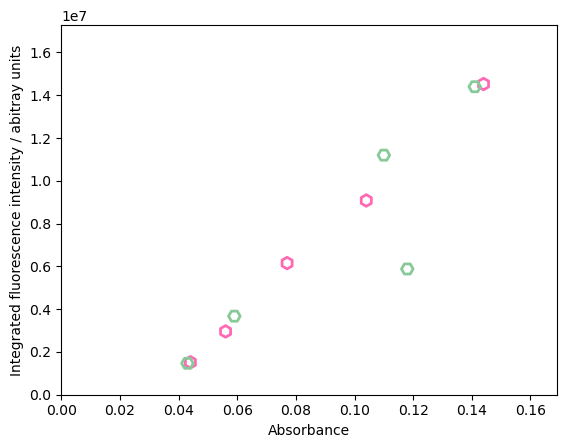

In [118]:
# developing plots
import matplotlib.pyplot as plt
import numpy as np

print(hcqy_plot.iloc[0:5,1])
print(hcqy_plot.iloc[0:5,5])


x =hcqy_plot.iloc[0:5,1]
y = hcqy_plot.iloc[0:5,5]
plt.scatter(x, y, s=70, facecolors='none', edgecolors='hotpink', linewidths=2.0, marker = "h")

x = hcqy_plot.iloc[0:5,2]
y = hcqy_plot.iloc[0:5,6]
plt.scatter(x, y,s=70, facecolors='none', edgecolors='#88c999', linewidths=2.0, marker = "H" )

#designing the plot
plt.xlim(0,(1.2*max(x)))
plt.ylim(0,(1.2*max(y)))
plt.xlabel("Absorbance")
plt.ylabel("Integrated fluorescence intensity / abitray units")

plt.show()